<a href="https://colab.research.google.com/github/JakubPyt/fcc_predict_health_costs/blob/main/fcc_predict_health_costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Health Costs Calculator

This project is part of the "Machine Learning with Python" course on freeCodeCamp website. 

Below is a description of the project.

## Task from the website

*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

     |████████████████████████████████| 1.0MB 4.1MB/s 


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2021-05-11 11:04:05--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.003s  

2021-05-11 11:04:05 (18.2 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


# My work

Initially there was only one cell. I made all the cells(code and comments) until 'Test from the website' header.

## Inspect the data

First, let's collect some information about data.

Let's look into dataset.

In [134]:
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


Ok, now, let's take a look for a NaN values.

In [135]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

Sector clear, we can go ahead.

Let's collect some information about numeric columns.

In [136]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


Cell below will display us values in columns(if number of unique values is less than 10) or number of unique values(if more than 10).

In [137]:
for column in dataset:
    if dataset[column].nunique() < 10:
        print(column, "=", pd.unique(dataset[column]))
    else:
        print(column, "have", dataset[column].nunique(), "different values.")

age have 47 different values.
sex = ['female' 'male']
bmi have 275 different values.
children = [0 1 3 2 5 4]
smoker = ['yes' 'no']
region = ['southwest' 'southeast' 'northwest' 'northeast']
expenses have 1337 different values.


Now we have a lot information about categorical and numeric data, but one more question to dataset:

In [138]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

Summary:
 - We don't have NaN values in dataset.
 - We have 4 numeric columns('age', 'bmi', 'children', 'expenses').
     - We will have to normalize values.
 - We have 3 categorical columns('sex', 'smoker', 'region').
     - We will have to map values or decompose them.

## Visualization 

"One chart says more than a thousand words."

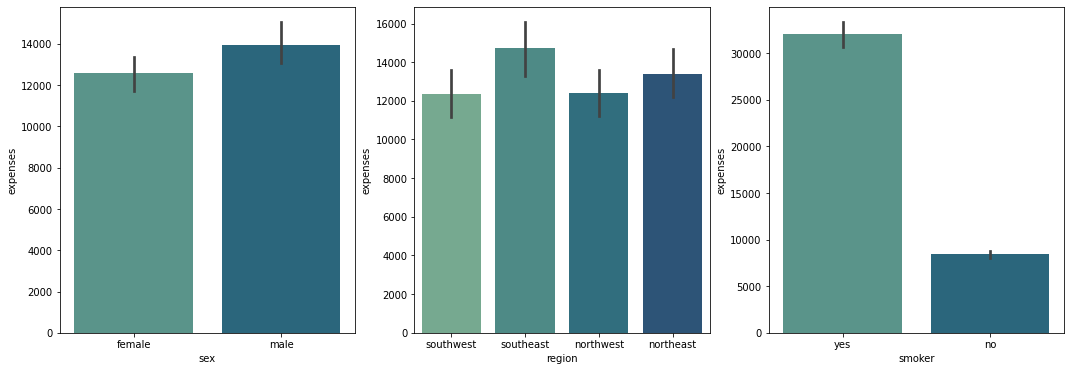

In [139]:
fig, ax = plt.subplots(1,3, figsize=(18,6))

i = 1
for column in ['sex', 'region', 'smoker']:
    plt.subplot(1, 3, i)
    ax = sns.barplot(
        data=dataset,
        x=column,
        y='expenses',
        palette="crest"
    )
    i += 1

In the figure above we can see that:
 - There is small difference between expenses by sex.
 - Also regions have small difference in expenses.
 - But smokers have much bigger expenses.

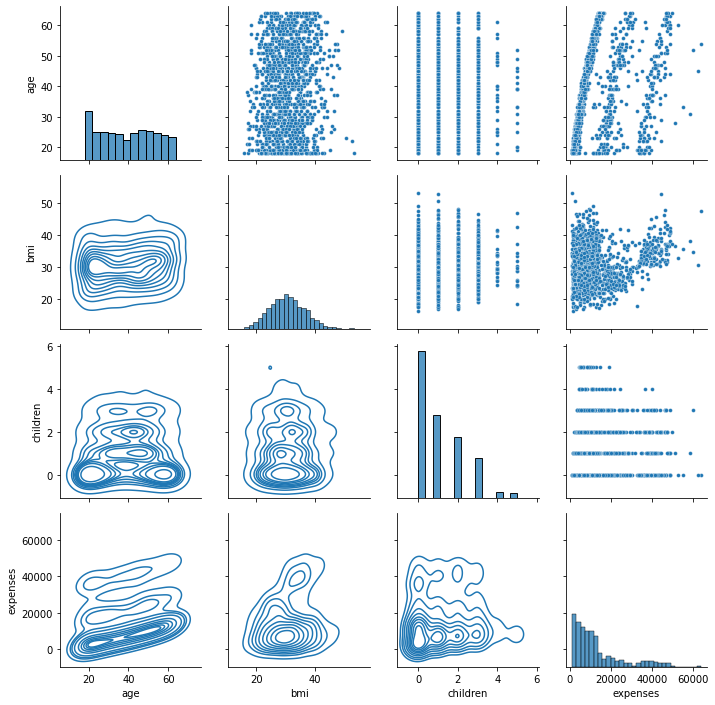

In [140]:
g = sns.PairGrid(
    dataset[['age', 'bmi', 'children' ,'expenses']]
)
g.map_upper(sns.scatterplot, s=15)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)


## Prepare the data

Let's get to work... But first, let's make a coffee! Sorry, copy of course.



In [141]:
prepared_data = dataset.copy()

From inspection we know that we should map values in two columns:
 - column 'Sex':
    - 0 for male
    - 1 for female
 - column 'Smoker':
    - 0 for NON-smoker
    - 1 for smoker

In [142]:
prepared_data['smoker'] = prepared_data['smoker'].map({'no': 0, 'yes': 1})
prepared_data['sex'] = prepared_data['sex'].map({'female': 1, 'male': 0})

Column 'region' we will decompose into 4 columns(one for each column).

In [143]:
prepared_data = pd.get_dummies(
    prepared_data,
    columns=['region'],
    prefix='',
    prefix_sep=''
)

Let's see what came out of it:

In [144]:
prepared_data.tail()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
1333,50,0,31.0,3,0,10600.55,0,1,0,0
1334,18,1,31.9,0,0,2205.98,1,0,0,0
1335,18,1,36.9,0,0,1629.83,0,0,1,0
1336,21,1,25.8,0,0,2007.95,0,0,0,1
1337,61,1,29.1,0,1,29141.36,0,1,0,0


## Train test split

Now let's split dataset into train and test dataset.

And then, we will split labels('expenses') from the features.

In 'Task from the website' we have exact guidelines how train and test dataset should looks like.

In [145]:
from sklearn.model_selection import train_test_split

tts_data = prepared_data.copy()

X = tts_data.drop('expenses', axis=1)
y = tts_data.pop('expenses')

train_dataset, test_dataset, train_labels, test_labels = train_test_split(
    X, y,
    test_size=0.2
)

test_dataset.tail()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
239,44,0,38.1,1,0,0,0,1,0
542,63,1,36.3,0,0,0,0,1,0
474,54,0,25.1,3,1,0,0,0,1
352,30,1,27.7,0,0,0,0,0,1
579,25,1,23.5,0,0,1,0,0,0


## Normalization

Now we can create first layer of the model - normalization layer, prepared for the data from train_dataset.

In [146]:
from tensorflow.keras.layers.experimental import preprocessing

normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

## Model

And finally - model.

We create model with:
 - one normalization layer(from previous cell with code) 
 - two hidden layers
 - one output

In [147]:
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(units=1)
])

Before we start fitting the model, let's set the parameters.

In [148]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=['mean_absolute_error'], # Decides about pass the tests from website
    metrics=['mean_absolute_error', 'mean_squared_error']  # mse is required in tests from website
)

And finally - fit the model.

In [149]:
history = model.fit(
    train_dataset, 
    train_labels,
    epochs=50,
    verbose=0,
)

## Results

Let's see how model will handle with test dataset:

In [150]:
model.evaluate(
    test_dataset,
    test_labels,
    verbose=1
)

9/9 [==============================] - 0s 1ms/step - loss: 1707.2432 - mean_absolute_error: 1707.2432 - mean_squared_error: 23048416.0000


[1707.2431640625, 1707.2431640625, 23048416.0]

Satisfactorily.

And chart for fitting the model.

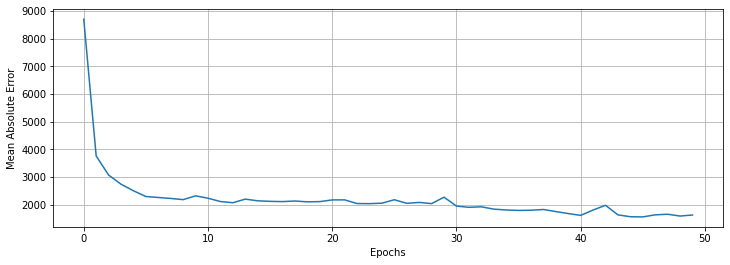

In [151]:
plt.figure(figsize=(12,4))
plt.plot(
    history.history['mean_absolute_error']
)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.grid(True)
plt.show()

When everything is done, we can start the tests.

# Tests from the website

9/9 - 0s - loss: 1707.2432 - mean_absolute_error: 1707.2432 - mean_squared_error: 23048416.0000
Testing set Mean Abs Error: 1707.24 expenses
You passed the challenge. Great job!


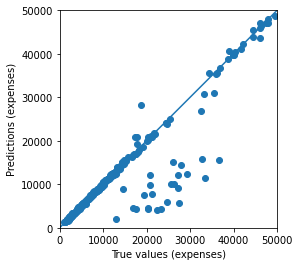

In [152]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
